# Gaussian Mixture models

Converged at iteration 6


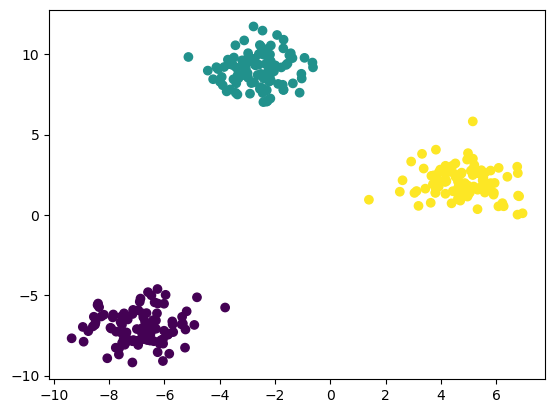

In [13]:
import numpy as np

class GaussianMixtureModel:
    def __init__(self, n_components, max_iter=100, tol=1e-6):
        self.n_components = n_components  # Number of Gaussian components
        self.max_iter = max_iter          # Maximum number of iterations
        self.tol = tol                    # Tolerance for convergence

    def _initialize_params(self, X):
        # Randomly initialize means (using data points)
        n_samples, n_features = X.shape
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        
        # Initialize covariances (as identity matrices initially)
        self.covariances = np.array([np.eye(n_features)] * self.n_components)
        
        # Initialize weights uniformly
        self.weights = np.ones(self.n_components) / self.n_components
        
    def _gaussian_pdf(self, X, mean, cov):
        """ Compute the probability density of a Gaussian. """
        n_features = X.shape[1]
        cov_inv = np.linalg.inv(cov)
        diff = X - mean
        exponent = np.einsum('...k,kl,...l->...', diff, cov_inv, diff)  # Mahalanobis distance
        return np.exp(-0.5 * exponent) / np.sqrt(((2 * np.pi) ** n_features) * np.linalg.det(cov))
    
    def _e_step(self, X):
        """ E-step: compute responsibilities (gamma). """
        self.resp = np.zeros((X.shape[0], self.n_components))
        
        for k in range(self.n_components):
            self.resp[:, k] = self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k])
        
        self.resp = self.resp / self.resp.sum(axis=1, keepdims=True)  # Normalize to get probabilities
    
    def _m_step(self, X):
        """ M-step: update the parameters (weights, means, covariances). """
        n_samples = X.shape[0]
        
        # Sum responsibilities for each Gaussian component
        Nk = self.resp.sum(axis=0)
        
        # Update means
        self.means = np.dot(self.resp.T, X) / Nk[:, np.newaxis]
        
        # Update covariances
        for k in range(self.n_components):
            diff = X - self.means[k]
            self.covariances[k] = np.dot(self.resp[:, k] * diff.T, diff) / Nk[k]
            self.covariances[k] += np.eye(X.shape[1]) * 1e-6  # Regularization to avoid singular matrices
            
        # Update weights
        self.weights = Nk / n_samples

    def fit(self, X):
        """ Fit the model to the data using the EM algorithm. """
        self._initialize_params(X)
        log_likelihood = 0
        
        for iteration in range(self.max_iter):
            prev_log_likelihood = log_likelihood
            
            # E-step
            self._e_step(X)
            
            # M-step
            self._m_step(X)
            
            # Compute log likelihood
            log_likelihood = np.sum(np.log(np.dot(self.resp, self.weights)))
            
            # Check for convergence
            if np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                print(f"Converged at iteration {iteration}")
                break

    def predict_proba(self, X):
        """ Compute the posterior probability of each Gaussian component for the given data. """
        self._e_step(X)
        return self.resp

    def predict(self, X):
        """ Assign each sample to the most probable Gaussian component. """
        return np.argmax(self.predict_proba(X), axis=1)

# Example usage:
if __name__ == "__main__":
    # Generate synthetic data
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
    
    # Fit GMM model
    gmm = GaussianMixtureModel(n_components=3)
    gmm.fit(X)
    
    # Predict cluster labels
    labels = gmm.predict(X)
    
    # Visualize the result
    import matplotlib.pyplot as plt
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.show()


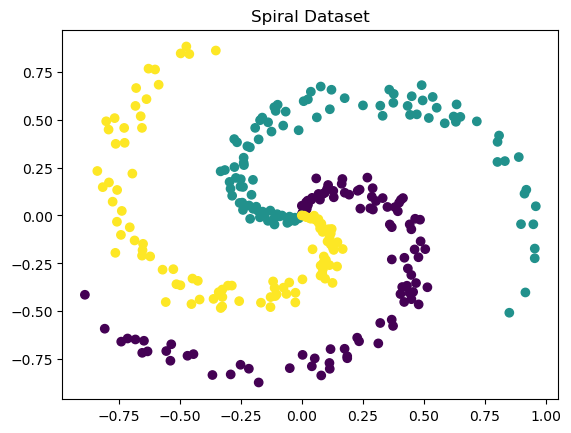

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral(n_points, noise=0.5, n_classes=3):
    np.random.seed(0)
    X = []
    y = []
    
    for i in range(n_classes):
        r = np.linspace(0.0, 1, n_points)
        t = np.linspace(i * 4, (i + 1) * 4, n_points) + np.random.randn(n_points) * noise
        x1 = r * np.sin(t)
        x2 = r * np.cos(t)
        X.extend(np.stack([x1, x2], axis=1))
        y.extend([i] * n_points)
        
    X = np.array(X)
    y = np.array(y)
    return X, y

# Generate dataset
X, y = generate_spiral(n_points=100, n_classes=3, noise=0.2)

# Visualize dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Spiral Dataset")
plt.show()


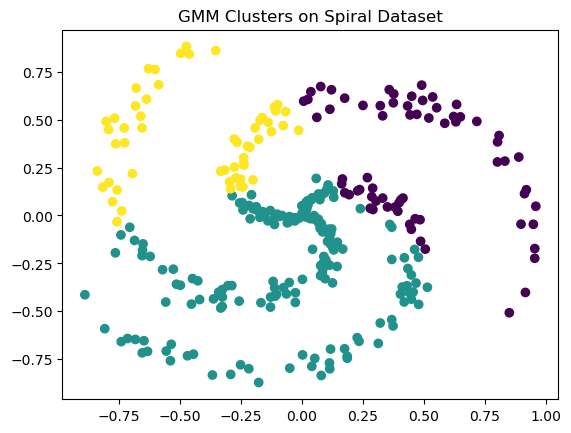

In [3]:
from sklearn.mixture import GaussianMixture

# Fit GMM to the spiral data
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X)

# Predict the cluster for each point
y_gmm = gmm.predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')
plt.title("GMM Clusters on Spiral Dataset")
plt.show()


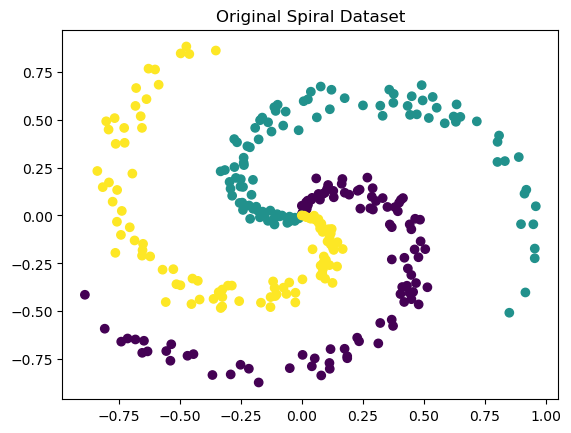

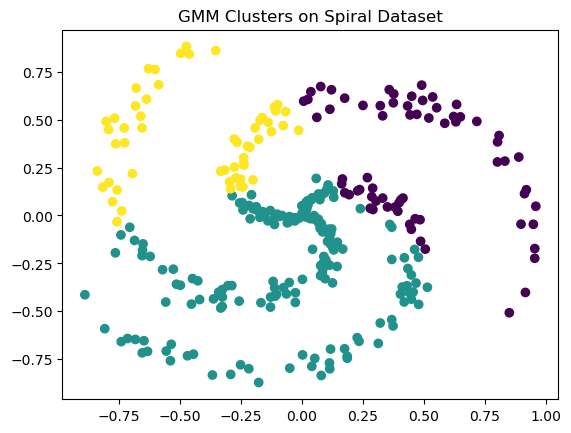

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate the spiral dataset
def generate_spiral(n_points, noise=0.5, n_classes=3):
    np.random.seed(0)
    X = []
    y = []
    
    for i in range(n_classes):
        r = np.linspace(0.0, 1, n_points)
        t = np.linspace(i * 4, (i + 1) * 4, n_points) + np.random.randn(n_points) * noise
        x1 = r * np.sin(t)
        x2 = r * np.cos(t)
        X.extend(np.stack([x1, x2], axis=1))
        y.extend([i] * n_points)
        
    X = np.array(X)
    y = np.array(y)
    return X, y

# Visualize the original dataset
def plot_data(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title(title)
    plt.show()

# Main function
if __name__ == "__main__":
    # Step 1: Generate the spiral dataset
    X, y = generate_spiral(n_points=100, n_classes=3, noise=0.2)
    
    # Step 2: Visualize the dataset
    plot_data(X, y, "Original Spiral Dataset")

    # Step 3: Fit GMM to the dataset
    gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
    gmm.fit(X)
    
    # Step 4: Predict clusters
    y_gmm = gmm.predict(X)
    
    # Step 5: Visualize the GMM clusters
    plot_data(X, y_gmm, "GMM Clusters on Spiral Dataset")


In [13]:
def plot_decision_boundary(X, y, model, h=0.1,title='Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict classes for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Create the contour plot
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

    # Plot the training points
    scatter=plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
    
    handles, labels = scatter.legend_elements(prop="colors")
    plt.legend(handles, labels, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()
def calculate_accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = y_true.shape[0]
    accuracy = correct_predictions / total_samples
    return accuracy 

In [123]:
import pandas as pd
df_train=pd.read_csv('Train.csv')
X_train=df_train.drop(columns=['label'],axis=1).to_numpy()
y_train=df_train['label'].to_numpy()
X_train.shape,y_train.shape

((1123, 2), (1123,))

GaussianMixture(n_components=2, random_state=0)

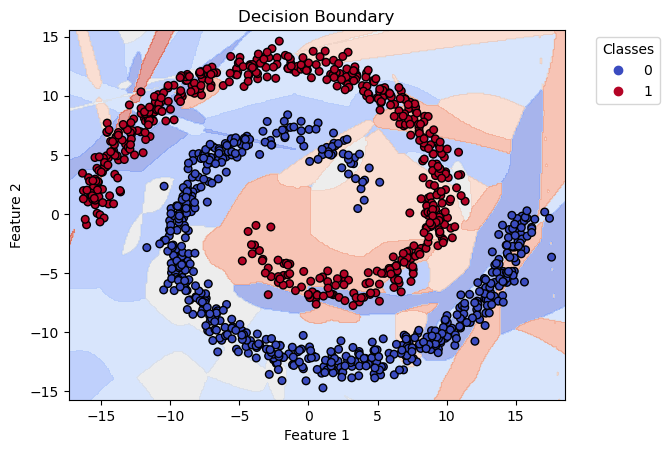

0.006233303650934996

In [173]:
gmm = GaussianMixtureModel(n_components=50)
gmm.fit(X_train)
plot_decision_boundary(X_train, y_train, gmm)
calculate_accuracy(y_train,gmm.predict(X_train))

### K mean


In [34]:
def k_means(self, X, k, max_change=1e-4, max_iter=300, random_state=None):
    # Validate inputs
    if not isinstance(X, np.ndarray):
        raise ValueError("Input X must be a numpy array.")
    if not isinstance(k, int) or k <= 0:
        raise ValueError("Number of clusters k must be a positive integer.")
    if not isinstance(max_change, float) or max_change <= 0:
        raise ValueError("max_change must be a positive float.")
    if not isinstance(max_iter, int) or max_iter <= 0:
        raise ValueError("max_iter must be a positive integer.")
    if random_state is not None:
        np.random.seed(random_state)
    initial_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[initial_indices]
    for iteration in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < max_change:
            break
        centroids = new_centroids
    else:
        print("Reached maximum iterations without convergence.")

    return centroids

In [35]:
import numpy as np

class KMeansPerClass:
    def __init__(self, k, max_change=1e-4, max_iter=300, random_state=None):
        self.k = k
        self.max_change = max_change
        self.max_iter = max_iter
        self.random_state = random_state

    def k_means(self, X):
        # Apply k-means clustering to the given data X
        if not isinstance(X, np.ndarray):
            raise ValueError("Input X must be a numpy array.")
        if not isinstance(self.k, int) or self.k <= 0:
            raise ValueError("Number of clusters k must be a positive integer.")
        if not isinstance(self.max_change, float) or self.max_change <= 0:
            raise ValueError("max_change must be a positive float.")
        if not isinstance(self.max_iter, int) or self.max_iter <= 0:
            raise ValueError("max_iter must be a positive integer.")
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # Initialize centroids randomly from data points
        initial_indices = np.random.choice(X.shape[0], self.k, replace=False)
        centroids = X[initial_indices]

        for iteration in range(self.max_iter):
            # Compute distances between each data point and each centroid
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            
            # Update centroids by calculating the mean of points in each cluster
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.k)])

            # Check for convergence
            if np.linalg.norm(new_centroids - centroids) < self.max_change:
                break
            centroids = new_centroids
        else:
            print("Reached maximum iterations without convergence.")
        
        return centroids, labels

    def k_means_per_class(self, X, y):
        # Apply k-means clustering for each class and compute mean and covariance
        unique_classes = np.unique(y)
        class_stats = {}

        for class_label in unique_classes:
            # Extract data points for the current class
            class_data = X[y == class_label]

            # Apply k-means clustering on the class data
            centroids, labels = self.k_means(class_data)

            # Calculate mean and covariance matrix for each cluster
            means = []
            covariances = []
            for j in range(self.k):
                cluster_data = class_data[labels == j]
                if len(cluster_data) > 1:  # Covariance requires at least 2 samples
                    means.append(cluster_data.mean(axis=0))
                    covariances.append(np.cov(cluster_data, rowvar=False))
                else:
                    # Handle the case where a cluster has 1 or 0 points
                    means.append(np.zeros(class_data.shape[1]))
                    covariances.append(np.zeros((class_data.shape[1], class_data.shape[1])))

            class_stats[class_label] = {'means': np.array(means), 'covariances': np.array(covariances)}

        return class_stats


In [36]:
# Example usage:
X = np.array([[1, 2], [2, 3], [3, 4], [8, 9], [9, 10], [10, 11]])
y = np.array([0, 0, 0, 1, 1, 1])

kmeans = KMeansPerClass(k=2, random_state=42)
class_statistics = kmeans.k_means_per_class(X, y)

# Display results
for class_label, stats in class_statistics.items():
    print(f"Class {class_label}:")
    print("Means:", stats['means'])
    print("Covariances:", stats['covariances'])


Class 0:
Means: [[0.  0. ]
 [2.5 3.5]]
Covariances: [[[0.  0. ]
  [0.  0. ]]

 [[0.5 0.5]
  [0.5 0.5]]]
Class 1:
Means: [[ 0.   0. ]
 [ 9.5 10.5]]
Covariances: [[[0.  0. ]
  [0.  0. ]]

 [[0.5 0.5]
  [0.5 0.5]]]


In [62]:
import numpy as np

def k_means(X, k, max_change=1e-4, max_iter=300, random_state=None):
    # Validate inputs
    if not isinstance(X, np.ndarray):
        raise ValueError("Input X must be a numpy array.")
    if not isinstance(k, int) or k <= 0:
        raise ValueError("Number of clusters k must be a positive integer.")
    if not isinstance(max_change, float) or max_change <= 0:
        raise ValueError("max_change must be a positive float.")
    if not isinstance(max_iter, int) or max_iter <= 0:
        raise ValueError("max_iter must be a positive integer.")
    
    # Set random state for reproducibility
    if random_state is not None:
        np.random.seed(random_state)

    # Randomly initialize centroids
    initial_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[initial_indices]

    # K-means loop
    for iteration in range(max_iter):
        # Compute distances from each point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Calculate new centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < max_change:
            break
        
        centroids = new_centroids
    else:
        print("Reached maximum iterations without convergence.")
    
    # Compute covariance matrix for each cluster
    covariances = []
    for j in range(k):
        cluster_points = X[labels == j]
        if len(cluster_points) > 1:
            cov_matrix = np.cov(cluster_points, rowvar=False)
        else:
            # If there's only one point in the cluster, covariance matrix is zero
            cov_matrix = np.zeros((X.shape[1], X.shape[1]))
        covariances.append(cov_matrix)
    
    return centroids, covariances


def cluster_by_class( X, y, n_clusters=1, max_change=1e-4, max_iter=300):
    unique_labels = np.unique(y)
    all_centroids = []
    all_labels = []

    for label in unique_labels:
        class_data = X[y == label]
        centroids, covariances = k_means(class_data, n_clusters, max_change, max_iter)
        all_centroids.append(centroids)
        all_covariances.append(covariances)
        all_labels.append([label] * len(centroids)) 
    centroids_array = np.vstack(all_centroids)
    covariances_array = np.vstack(all_covariances)
    
    labels_array = np.concatenate(all_labels)
    
    return centroids_array,covariances_array, labels_array

In [63]:
X = np.array([[1.0, 2.0],
              [1.5, 1.8],
              [5.0, 8.0],
              [8.0, 8.0],
              [1.0, 0.6]])

# Corresponding class labels (2 classes: 0 and 1)
y = np.array([0, 0, 1, 1, 0])

In [64]:
cluster_by_class(X,y,2)

(array([[1.  , 0.6 ],
        [1.25, 1.9 ],
        [5.  , 8.  ],
        [8.  , 8.  ]]),
 array([[[ 0.   ,  0.   ],
         [ 0.   ,  0.   ]],
 
        [[ 0.125, -0.05 ],
         [-0.05 ,  0.02 ]],
 
        [[ 0.   ,  0.   ],
         [ 0.   ,  0.   ]],
 
        [[ 0.   ,  0.   ],
         [ 0.   ,  0.   ]]]),
 array([0, 0, 1, 1]))

In [74]:
import numpy as np
from sklearn.mixture import GaussianMixture

class GaussianMixturePerClass:
    def __init__(self, n_components_per_class=1, covariance_type='full'):
        """
        Initialize the Gaussian Mixture Models for each class.

        Parameters:
        n_components_per_class: int, optional (default=1)
            The number of mixture components for each class.
        
        covariance_type: string, optional (default='full')
            The type of covariance to use in the GMM ('full', 'tied', 'diag', 'spherical').
        """
        self.n_components_per_class = n_components_per_class
        self.covariance_type = covariance_type
        self.gmms = {}

    def fit(self, X, y):
        """
        Fit a separate Gaussian Mixture Model for each class.

        Parameters:
        X: array-like, shape (n_samples, n_features)
            Training data.
        
        y: array-like, shape (n_samples,)
            Class labels for the training data.
        """
        self.classes_ = np.unique(y)
        
        for cls in self.classes_:
            # Select data for this class
            X_cls = X[y == cls]
            
            # Create and fit the Gaussian Mixture Model for this class
            gmm = GaussianMixtureModel(n_components=self.n_components_per_class)
            gmm.fit(X_cls)
            
            # Store the model for this class
            self.gmms[cls] = gmm

    def predict(self, X):
        """
        Predict the class label based on the likelihood under each GMM.
        
        Parameters:
        X: array-like, shape (n_samples, n_features)
            Data to classify.

        Returns:
        labels: array, shape (n_samples,)
            Predicted class labels for each data point.
        """
        # Compute the likelihood of the data under each class's GMM
        log_likelihoods = np.array([self.gmms[cls].score_samples(X) for cls in self.classes_]).T
        
        # Assign each sample to the class with the highest log likelihood
        return self.classes_[np.argmax(log_likelihoods, axis=1)]

    def predict_proba(self, X):
        """
        Predict the probability of the data belonging to each class.

        Parameters:
        X: array-like, shape (n_samples, n_features)
            Data to classify.

        Returns:
        proba: array, shape (n_samples, n_classes)
            Probability estimates for each class.
        """
        # Compute the likelihood of the data under each class's GMM
        log_likelihoods = np.array([self.gmms[cls].predict_proba(X) for cls in self.classes_]).T
        
        # Convert log likelihoods to probabilities
        proba = np.exp(log_likelihoods)
        
        # Normalize the probabilities so they sum to 1 for each sample
        return proba / proba.sum(axis=1, keepdims=True)


In [75]:
# Example dataset


# Initialize the GaussianMixturePerClass model with 2 components for each class
gmm_model = GaussianMixturePerClass(n_components_per_class=)

# Fit the model
gmm_model.fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, gmm_model)
calculate_accuracy(y_train,gmm_model.predict(X_train))


AttributeError: 'GaussianMixtureModel' object has no attribute 'score_samples'

In [15]:
class GaussianMixtureModel:
    def __init__(self, n_components, max_iter=100, tol=1e-6):
        self.n_components = n_components  
        self.max_iter = max_iter          
        self.tol = tol                    

    def _initialize_params_random(self, X):
        n_samples, n_features = X.shape
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        self.covariances = np.array([np.eye(n_features)] * self.n_components)
        self.weights = np.ones(self.n_components) / self.n_components
        
    def _initialize_params_kmeans(self, X):
        n_samples, n_features = X.shape
        # self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        # self.covariances = np.array([np.eye(n_features)] * self.n_components)
        # self.weights = np.ones(self.n_components) / self.n_components
        initial_indices = np.random.choice(X.shape[0], self.n_components, replace=False)
        self.means = X[initial_indices]
        for iteration in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.means, axis=2)
            labels = np.argmin(distances, axis=1)
            
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_components)])
            if np.linalg.norm(new_centroids - self.means) < self.tol:
                break
            
            self.means = new_centroids
        else:
            print("Reached maximum iterations without convergence.")
        self.covariances = []
        self.weights = np.array([np.sum(labels == j) for j in range(self.n_components)])
        for j in range(self.n_components):
            cluster_points = X[labels == j]
            if len(cluster_points) > 1:
                cov_matrix = np.cov(cluster_points, rowvar=False)
            else:
                cov_matrix = np.zeros((X.shape[1], X.shape[1]))
            self.covariances.append(cov_matrix)

    def _gaussian_pdf(self, X, mean, cov):
        """ Compute the probability density of a Gaussian. """
        n_features = X.shape[1]
        cov_inv = np.linalg.inv(cov)
        diff = X - mean
        exponent = np.einsum('...k,kl,...l->...', diff, cov_inv, diff)  # Mahalanobis distance
        return np.exp(-0.5 * exponent) / np.sqrt(((2 * np.pi) ** n_features) * np.linalg.det(cov))
    
    def _e_step(self, X):
        """ E-step: compute responsibilities (gamma). """
        self.resp = np.zeros((X.shape[0], self.n_components))
        
        for k in range(self.n_components):
            self.resp[:, k] = self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k])
        
        self.resp = self.resp / self.resp.sum(axis=1, keepdims=True)  # Normalize to get probabilities
    
    def _m_step(self, X):
        """ M-step: update the parameters (weights, means, covariances). """
        n_samples = X.shape[0]
        
        Nk = self.resp.sum(axis=0)
        self.means = np.dot(self.resp.T, X) / Nk[:, np.newaxis]
        for k in range(self.n_components):
            diff = X - self.means[k]
            self.covariances[k] = np.dot(self.resp[:, k] * diff.T, diff) / Nk[k]
            self.covariances[k] += np.eye(X.shape[1]) * 1e-6  # Regularization to avoid singular matrices
            
        # Update weights
        self.weights = Nk / n_samples

    def fit(self, X,initialization="random"):
        """ Fit the model to the data using the EM algorithm. """
        if initialization=="random":
            self._initialize_params_random(X)
        elif initialization=="kmeans":
            self._initialize_params_kmeans(X)
        log_likelihood = 0
        for iteration in range(self.max_iter):
            prev_log_likelihood = log_likelihood
            self._e_step(X)
            self._m_step(X)
            log_likelihood = np.sum([np.log(np.sum([self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k]) for k in range(self.n_components)], axis=0))])

            if np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                print(f"Converged at iteration {iteration}")
                break

    def score_samples(self, X):
        return np.sum([self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k]) for k in range(self.n_components)], axis=0)



In [6]:
class GaussianMixturePerClass:
    def __init__(self, n_components_per_class=1, covariance_type='full'):
        self.n_components_per_class = n_components_per_class
        self.covariance_type = covariance_type
        self.gmms = {}
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.priors = {}
        for cls in self.classes_:
            X_cls = X[y == cls]
            if self.covariance_type=="full":
                gmm = GaussianMixtureModel(n_components=self.n_components_per_class)
            else:
                gmm = GaussianMixtureModel_diagonal(n_components=self.n_components_per_class)
            gmm.fit(X_cls,initialization="kmeans")
            self.gmms[cls] = gmm
            self.priors[cls] = X_cls.shape[0] / X.shape[0]
    def predict(self, X):
        posterior = np.array([self.gmms[cls].score_samples(X)*self.priors[cls] for cls in self.classes_]).T
        predicted_class_indices = np.argmax(posterior, axis=1)
        return predicted_class_indices  
    def predict_proba(self, X):
        log_likelihoods = np.array([self.gmms[cls].score_samples(X) for cls in self.classes_]).T
        proba = np.exp(log_likelihoods)
        return proba / proba.sum(axis=1, keepdims=True)


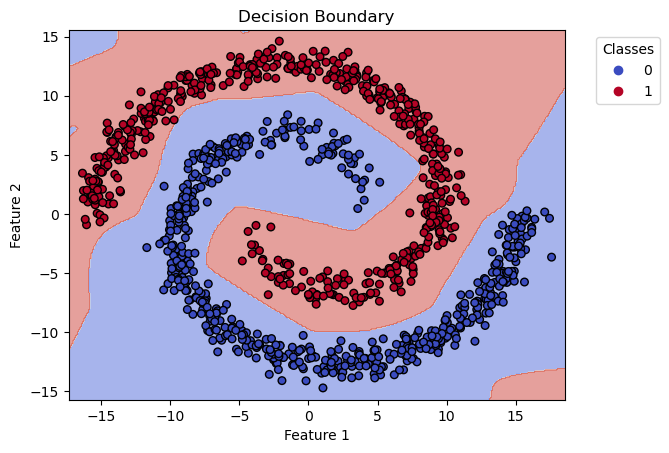

1.0

In [108]:
gmm_model = GaussianMixturePerClass(n_components_per_class=5)
gmm_model.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, gmm_model)
calculate_accuracy(y_train,gmm_model.predict(X_train))

In [37]:
gmm_model.predict(X_train)

array([0, 0, 0, ..., 0, 1, 1])

In [39]:
gmm_model.classes_

array([0., 1.])

array([1.08275442e-03, 8.65703690e-03, 4.57133795e-03, ...,
       6.29983280e-03, 7.09413240e-06, 8.68988327e-06])

In [3]:
def multivariate_gaussian(x, mean, cov):
    """Compute the multivariate Gaussian probability density function."""
    d = len(mean)
    diff = x - mean
    cov_inv = np.linalg.inv(cov)
    log_det_cov = np.log(np.linalg.det(cov))
    exponent = -0.5 * np.sum(diff @ cov_inv * diff, axis=1)
    return (1 / np.sqrt((2 * np.pi) ** d * np.exp(log_det_cov))) * np.exp(exponent)
def plot_gaussian_contours_gmm(X, y, model, h=0.1,title='Decision Boundary with Gaussian Contours'):
    """ Plot Gaussian contours along with the decision boundary and training data points. """
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict classes for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Create the contour plot
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    
    # Plot the Gaussian contours
    for cls,gmm in model.gmms.items():
        for c in range(gmm.n_components):
            mean = gmm.means[c]
            cov = gmm.covariances[c]
            pdf = multivariate_gaussian(np.c_[xx.ravel(), yy.ravel()], mean, cov).reshape(xx.shape)
            plt.contour(xx, yy, pdf, levels=np.linspace(0, pdf.max(), 10), cmap='plasma' , alpha=0.6)

    # Plot the training points
    scatter=plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
    
    handles, labels = scatter.legend_elements(prop="colors")
    plt.legend(handles, labels, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()   

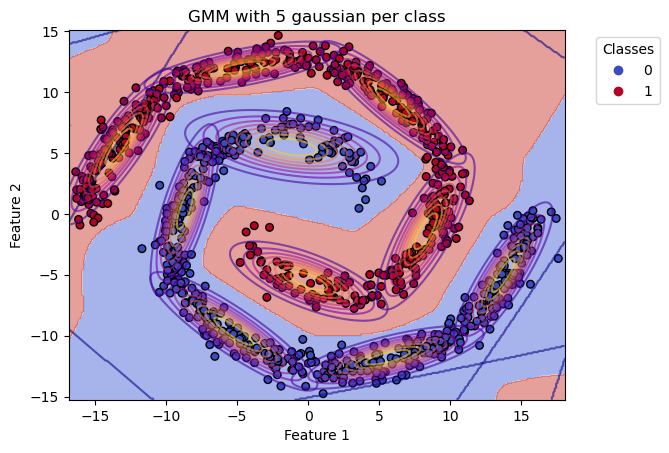

In [110]:

plot_gaussian_contours_gmm(X_train, y_train, gmm_model,title="GMM with 5 gaussian per class")

## Concentric circles

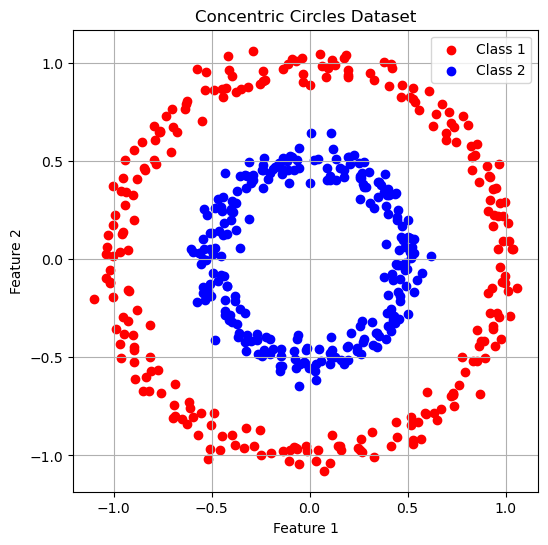

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate concentric circles dataset
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 2')
plt.title('Concentric Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [69]:
np.unique(y)

array([0, 1])

Converged at iteration 1
Converged at iteration 1


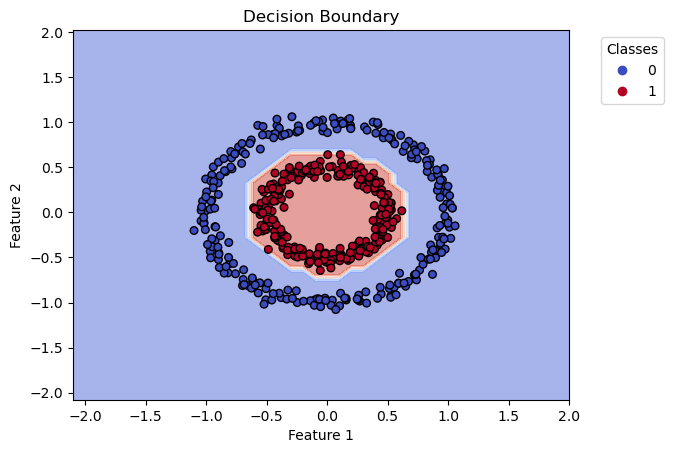

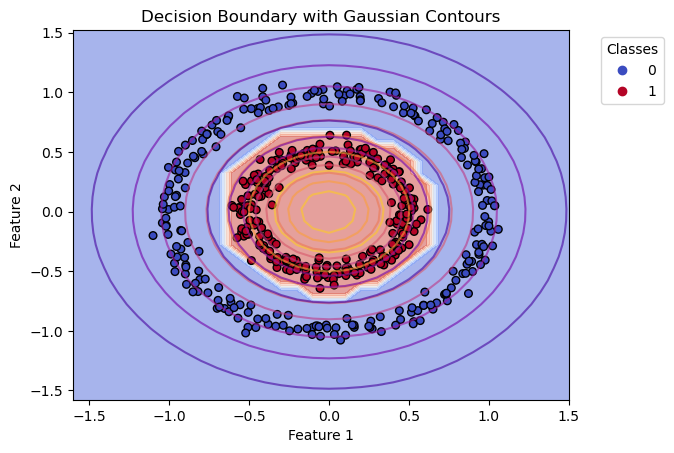

In [93]:
gmm_model = GaussianMixturePerClass(n_components_per_class=1)
gmm_model.fit(X, y)
plot_decision_boundary(X, y, gmm_model)

plot_gaussian_contours_gmm(X, y, gmm_model)

Converged at iteration 129
Converged at iteration 157


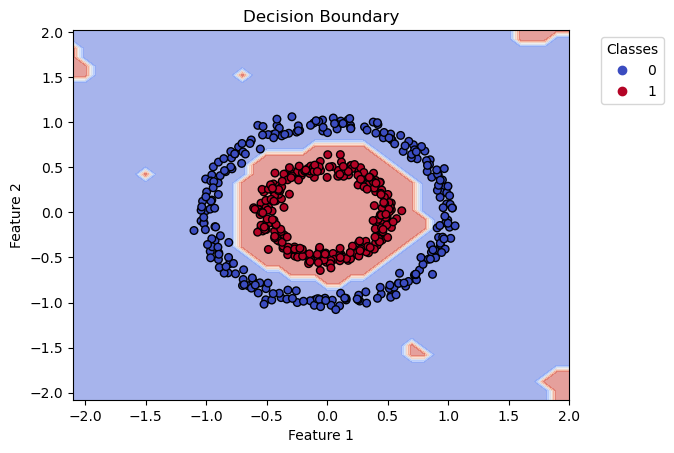

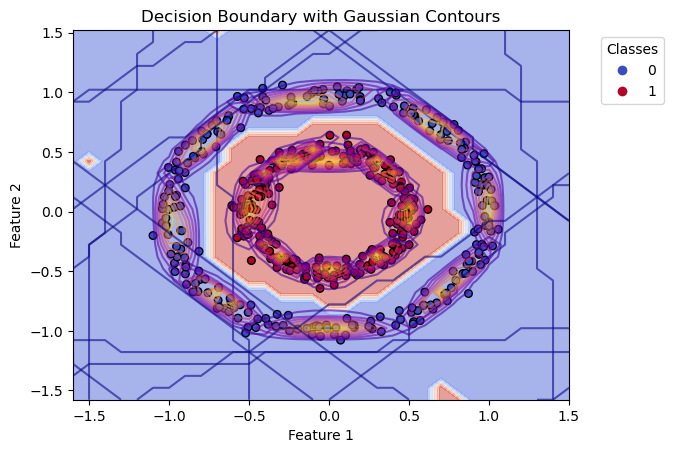

In [100]:
gmm_model = GaussianMixturePerClass(n_components_per_class=4)
gmm_model.fit(X, y)
plot_decision_boundary(X, y, gmm_model)

plot_gaussian_contours_gmm(X, y, gmm_model)

In [17]:
import numpy as np

class GaussianMixtureModel_diagonal:
    def __init__(self, n_components, max_iter=100, tol=1e-6):
        self.n_components = n_components  
        self.max_iter = max_iter          
        self.tol = tol                    

    def _initialize_params_random(self, X):
        n_samples, n_features = X.shape
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        self.covariances = np.ones((self.n_components, n_features))  # Diagonal covariances (variances only)
        self.weights = np.ones(self.n_components) / self.n_components
        
    def _initialize_params_kmeans(self, X):
        n_samples, n_features = X.shape
        initial_indices = np.random.choice(X.shape[0], self.n_components, replace=False)
        self.means = X[initial_indices]
        for iteration in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.means, axis=2)
            labels = np.argmin(distances, axis=1)
            
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_components)])
            if np.linalg.norm(new_centroids - self.means) < self.tol:
                break
            
            self.means = new_centroids
        else:
            print("Reached maximum iterations without convergence.")
        
        self.covariances = np.array([X[labels == j].var(axis=0) for j in range(self.n_components)])  # Diagonal covariances
        self.weights = np.array([np.sum(labels == j) for j in range(self.n_components)]) / n_samples

    def _gaussian_pdf(self, X, mean, cov_diag):
        """ Compute the probability density of a Gaussian with diagonal covariance. """
        n_features = X.shape[1]
        diff = X - mean
        exponent = np.sum((diff ** 2) / cov_diag, axis=1)  # Only diagonal elements of cov
        return np.exp(-0.5 * exponent) / np.sqrt(np.prod(2 * np.pi * cov_diag))
    
    def _e_step(self, X):
        """ E-step: compute responsibilities (gamma). """
        self.resp = np.zeros((X.shape[0], self.n_components))
        
        for k in range(self.n_components):
            self.resp[:, k] = self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k])
        
        self.resp = self.resp / self.resp.sum(axis=1, keepdims=True)  # Normalize to get probabilities
    
    def _m_step(self, X):
        """ M-step: update the parameters (weights, means, diagonal covariances). """
        n_samples, n_features = X.shape
        
        Nk = self.resp.sum(axis=0)
        self.means = np.dot(self.resp.T, X) / Nk[:, np.newaxis]
        
        for k in range(self.n_components):
            diff = X - self.means[k]
            # Only diagonal covariances (variances)
            self.covariances[k] = np.sum(self.resp[:, k][:, np.newaxis] * (diff ** 2), axis=0) / Nk[k]
        
        # Update weights
        self.weights = Nk / n_samples

    def fit(self, X, initialization="random"):
        """ Fit the model to the data using the EM algorithm. """
        if initialization == "random":
            self._initialize_params_random(X)
        elif initialization == "kmeans":
            self._initialize_params_kmeans(X)

        log_likelihood = 0
        for iteration in range(self.max_iter):
            prev_log_likelihood = log_likelihood
            self._e_step(X)
            self._m_step(X)
            
            log_likelihood = np.sum([
                np.log(np.sum([
                    self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k]) 
                    for k in range(self.n_components)], axis=0))
            ])
            
            if np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                print(f"Converged at iteration {iteration}")
                break

    def score_samples(self, X):
        return np.sum([self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k]) 
                       for k in range(self.n_components)], axis=0)


Converged at iteration 28
Converged at iteration 37


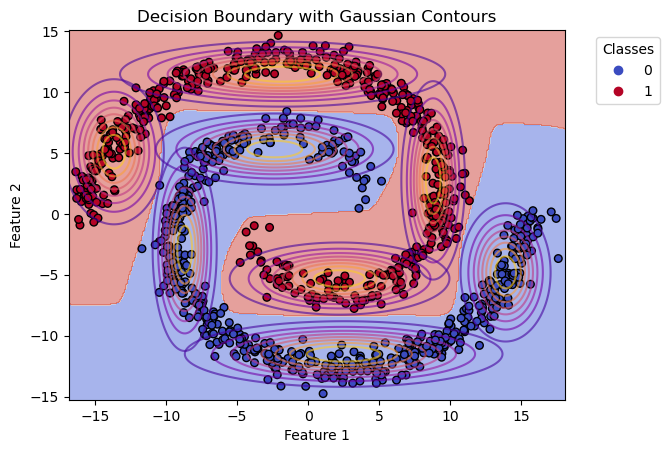

In [18]:
gmm_model = GaussianMixturePerClass(n_components_per_class=4)
gmm_model.fit(X_train, y_train)

plot_gaussian_contours_gmm(X_train, y_train, gmm_model)

In [9]:
import matplotlib.pyplot as plt

modified the countour so that it will avoid unnecessary outer lines which are not clear

In [179]:
import numpy as np
import matplotlib.pyplot as plt

def multivariate_gaussian(X, mean, cov):
    """Calculate the multivariate Gaussian PDF."""
    n_features = mean.size
    cov_inv = np.linalg.inv(cov + 1e-6 * np.eye(n_features))  # Regularization
    diff = X - mean
    exponent = -0.5 * np.einsum('...k,kl,...l->...', diff, cov_inv, diff)
    normalization_factor = 1 / np.sqrt(((2 * np.pi) ** n_features) * np.linalg.det(cov + 1e-6 * np.eye(n_features)))
    return normalization_factor * np.exp(exponent)

def plot_gaussian_contours_gmm(X, y, model, h=0.1, num_contour_lines=10, title='Decision Boundary with Gaussian Contours'):
    """Plot Gaussian contours along with the decision boundary and training data points."""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict classes for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Create the contour plot for decision boundaries
    contour_levels = np.linspace(Z.min(), Z.max(), num_contour_lines)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)  # Ignore outermost 3 levels
    
    # Plot the Gaussian contours
    for cls, gmm in model.gmms.items():
        for c in range(gmm.n_components):
            mean = gmm.means[c]
            cov = gmm.covariances[c] if isinstance(gmm, GaussianMixtureModel) else np.diag(gmm.covariances[c])
            pdf = multivariate_gaussian(np.c_[xx.ravel(), yy.ravel()], mean, cov).reshape(xx.shape)
            
            # Contours for Gaussian PDF
            pdf_levels = np.linspace(0, pdf.max(), num_contour_lines)[1:]  # Ignore outermost 3 levels
            plt.contour(xx, yy, pdf, levels=pdf_levels, cmap='plasma', alpha=0.6)

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
    
    # Add legend
    handles, labels = scatter.legend_elements(prop="colors")
    plt.legend(handles, labels, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Labels and Title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()


Converged at iteration 117
Converged at iteration 123


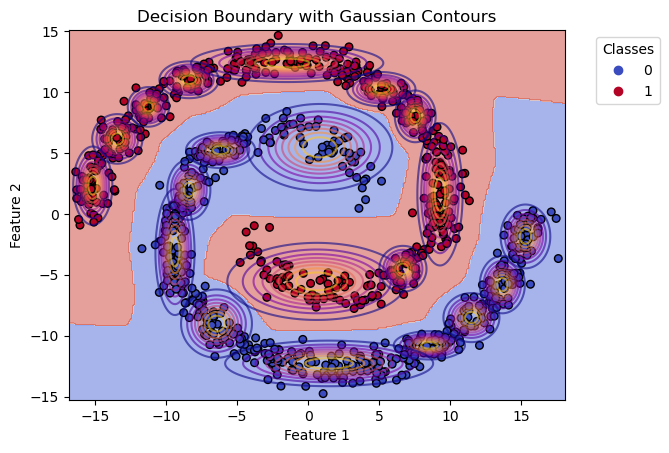

In [180]:
gmm_model = GaussianMixturePerClass(n_components_per_class=10,covariance_type='diag')
gmm_model.fit(X_train, y_train)
plot_gaussian_contours_gmm(X_train, y_train, gmm_model)

In [144]:
import numpy as np
import matplotlib.pyplot as plt
class GaussianMixtureModel:
    def __init__(self, n_components, max_iter=300, tol=1e-6):
        self.n_components = n_components  
        self.max_iter = max_iter          
        self.tol = tol                    

    def _initialize_params_random(self, X):
        n_samples, n_features = X.shape
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        self.covariances = np.array([np.eye(n_features)] * self.n_components)
        self.weights = np.ones(self.n_components) / self.n_components
        
    def _initialize_params_kmeans(self, X):
        n_samples, n_features = X.shape
        # self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        # self.covariances = np.array([np.eye(n_features)] * self.n_components)
        # self.weights = np.ones(self.n_components) / self.n_components
        initial_indices = np.random.choice(X.shape[0], self.n_components, replace=False)
        self.means = X[initial_indices]
        for iteration in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.means, axis=2)
            labels = np.argmin(distances, axis=1)
            
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_components)])
            if np.linalg.norm(new_centroids - self.means) < self.tol:
                break
            
            self.means = new_centroids
        else:
            print("Reached maximum iterations without convergence.")
        self.covariances = []
        self.weights = np.array([np.sum(labels == j) for j in range(self.n_components)])
        for j in range(self.n_components):
            cluster_points = X[labels == j]
            if len(cluster_points) > 1:
                cov_matrix = np.cov(cluster_points, rowvar=False)
            else:
                cov_matrix = np.zeros((X.shape[1], X.shape[1]))
            self.covariances.append(cov_matrix)

    def _gaussian_pdf(self, X, mean, cov):
        """ Compute the probability density of a Gaussian. """
        n_features = X.shape[1]
        cov_inv = np.linalg.inv(cov)
        diff = X - mean
        exponent = np.einsum('...k,kl,...l->...', diff, cov_inv, diff)  # Mahalanobis distance
        return np.exp(-0.5 * exponent) / np.sqrt(((2 * np.pi) ** n_features) * np.linalg.det(cov))
    
    def _e_step(self, X):
        """ E-step: compute responsibilities (gamma). """
        self.resp = np.zeros((X.shape[0], self.n_components))
        
        for k in range(self.n_components):
            self.resp[:, k] = self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k])
        
        self.resp = self.resp / self.resp.sum(axis=1, keepdims=True)  # Normalize to get probabilities
    
    def _m_step(self, X):
        """ M-step: update the parameters (weights, means, covariances). """
        n_samples = X.shape[0]
        
        Nk = self.resp.sum(axis=0)
        self.means = np.dot(self.resp.T, X) / Nk[:, np.newaxis]
        for k in range(self.n_components):
            diff = X - self.means[k]
            self.covariances[k] = np.dot(self.resp[:, k] * diff.T, diff) / Nk[k]
            self.covariances[k] += np.eye(X.shape[1]) * 1e-6  # Regularization to avoid singular matrices
            
        # Update weights
        self.weights = Nk / n_samples

    def fit(self, X,initialization="random"):
        """ Fit the model to the data using the EM algorithm. """
        if initialization=="random":
            self._initialize_params_random(X)
        elif initialization=="kmeans":
            self._initialize_params_kmeans(X)
        log_likelihood = 0
        for iteration in range(self.max_iter):
            prev_log_likelihood = log_likelihood
            self._e_step(X)
            self._m_step(X)
            log_likelihood = np.sum([np.log(np.sum([self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k]) for k in range(self.n_components)], axis=0))])

            if np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                print(f"Converged at iteration {iteration}")
                break

    def score_samples(self, X):
        return np.sum([self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k]) for k in range(self.n_components)], axis=0)

class GaussianMixtureModel_diagonal:
    def __init__(self, n_components, max_iter=300, tol=1e-6):
        self.n_components = n_components  
        self.max_iter = max_iter          
        self.tol = tol                    

    def _initialize_params_random(self, X):
        n_samples, n_features = X.shape
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        self.covariances = np.ones((self.n_components, n_features))  # Diagonal covariances (variances only)
        self.weights = np.ones(self.n_components) / self.n_components
        
    def _initialize_params_kmeans(self, X):
        n_samples, n_features = X.shape
        initial_indices = np.random.choice(X.shape[0], self.n_components, replace=False)
        self.means = X[initial_indices]
        for iteration in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.means, axis=2)
            labels = np.argmin(distances, axis=1)
            
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_components)])
            if np.linalg.norm(new_centroids - self.means) < self.tol:
                break
            
            self.means = new_centroids
        else:
            print("Reached maximum iterations without convergence.")
        
        self.covariances = np.array([X[labels == j].var(axis=0) for j in range(self.n_components)])  # Diagonal covariances
        self.weights = np.array([np.sum(labels == j) for j in range(self.n_components)]) / n_samples

    def _gaussian_pdf(self, X, mean, cov_diag):
        """ Compute the probability density of a Gaussian with diagonal covariance. """
        n_features = X.shape[1]
        diff = X - mean
        exponent = np.sum((diff ** 2) / cov_diag, axis=1)  # Only diagonal elements of cov
        return np.exp(-0.5 * exponent) / np.sqrt(np.prod(2 * np.pi * cov_diag))
    
    def _e_step(self, X):
        """ E-step: compute responsibilities (gamma). """
        self.resp = np.zeros((X.shape[0], self.n_components))
        
        for k in range(self.n_components):
            self.resp[:, k] = self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k])
        
        self.resp = self.resp / self.resp.sum(axis=1, keepdims=True)  # Normalize to get probabilities
    
    def _m_step(self, X):
        """ M-step: update the parameters (weights, means, diagonal covariances). """
        n_samples, n_features = X.shape
        
        Nk = self.resp.sum(axis=0)
        self.means = np.dot(self.resp.T, X) / Nk[:, np.newaxis]
        
        for k in range(self.n_components):
            diff = X - self.means[k]
            # Only diagonal covariances (variances)
            self.covariances[k] = np.sum(self.resp[:, k][:, np.newaxis] * (diff ** 2), axis=0) / Nk[k]
        
        # Update weights
        self.weights = Nk / n_samples

    def fit(self, X, initialization="random"):
        """ Fit the model to the data using the EM algorithm. """
        if initialization == "random":
            self._initialize_params_random(X)
        elif initialization == "kmeans":
            self._initialize_params_kmeans(X)

        log_likelihood = 0
        for iteration in range(self.max_iter):
            prev_log_likelihood = log_likelihood
            self._e_step(X)
            self._m_step(X)
            
            log_likelihood = np.sum([
                np.log(np.sum([
                    self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k]) 
                    for k in range(self.n_components)], axis=0))
            ])
            
            if np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                print(f"Converged at iteration {iteration}")
                break

    def score_samples(self, X):
        return np.sum([self.weights[k] * self._gaussian_pdf(X, self.means[k], self.covariances[k]) 
                       for k in range(self.n_components)], axis=0)





class GaussianMixturePerClass:
    def __init__(self, n_components_per_class=1, covariance_type='full',max_iter=300,tol=1e-6):
        self.n_components_per_class = n_components_per_class
        self.covariance_type = covariance_type
        self.max_iter=max_iter
        self.tol=tol
        self.gmms = {}
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.priors = {}
        for cls in self.classes_:
            X_cls = X[y == cls]
            if self.covariance_type=="full":
                gmm = GaussianMixtureModel(n_components=self.n_components_per_class,max_iter=self.max_iter,tol=self.tol)
            else:
                gmm = GaussianMixtureModel_diagonal(n_components=self.n_components_per_class,max_iter=self.max_iter,tol=self.tol)
            gmm.fit(X_cls,initialization="kmeans")
            self.gmms[cls] = gmm
            self.priors[cls] = X_cls.shape[0] / X.shape[0]
    def predict(self, X):
        posterior = np.array([self.gmms[cls].score_samples(X)*self.priors[cls] for cls in self.classes_]).T
        predicted_class_indices = np.argmax(posterior, axis=1)
        return predicted_class_indices  
    def predict_proba(self, X):
        log_likelihoods = np.array([self.gmms[cls].score_samples(X) for cls in self.classes_]).T
        proba = np.exp(log_likelihoods)
        return proba / proba.sum(axis=1, keepdims=True)



def multivariate_gaussian(x, mean, cov):
    """Compute the multivariate Gaussian probability density function."""
    d = len(mean)
    diff = x - mean
    cov_inv = np.linalg.inv(cov)
    log_det_cov = np.log(np.linalg.det(cov))
    exponent = -0.5 * np.sum(diff @ cov_inv * diff, axis=1)
    return (1 / np.sqrt((2 * np.pi) ** d * np.exp(log_det_cov))) * np.exp(exponent)
def plot_gaussian_contours_gmm(X, y, model, h=0.1,title='Decision Boundary with Gaussian Contours'):
    """ Plot Gaussian contours along with the decision boundary and training data points. """
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict classes for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Create the contour plot
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    
    # Plot the Gaussian contours
    for cls,gmm in model.gmms.items():
        for c in range(gmm.n_components):
            mean = gmm.means[c]
            if isinstance(gmm, GaussianMixtureModel_diagonal):
                cov = np.diag(gmm.covariances[c])
            else:
                cov = gmm.covariances[c]
            pdf = multivariate_gaussian(np.c_[xx.ravel(), yy.ravel()], mean, cov).reshape(xx.shape)
            plt.contour(xx, yy, pdf, levels=np.linspace(0, pdf.max(), 10), cmap='plasma' , alpha=0.6)

    # Plot the training points
    scatter=plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
    
    handles, labels = scatter.legend_elements(prop="colors")
    plt.legend(handles, labels, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()   









Converged at iteration 64
Converged at iteration 121


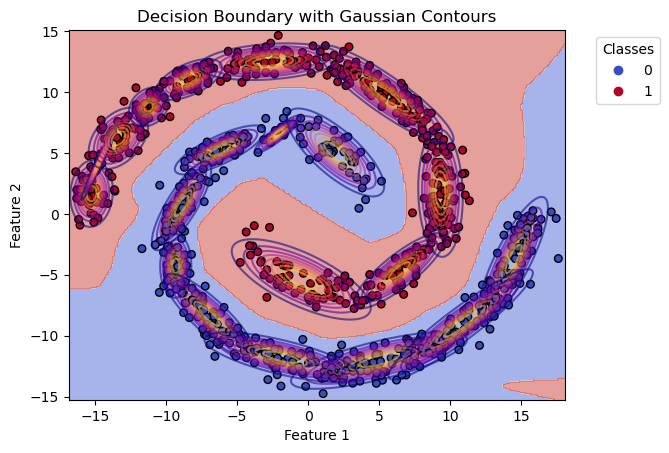

In [184]:
gmm_model = GaussianMixturePerClass(n_components_per_class=10,covariance_type='full')
gmm_model.fit(X_train, y_train)
# plot_decision_boundary(X_train, y_train, gmm_model)
plot_gaussian_contours_gmm(X_train, y_train, gmm_model)

Converged at iteration 191
Converged at iteration 75


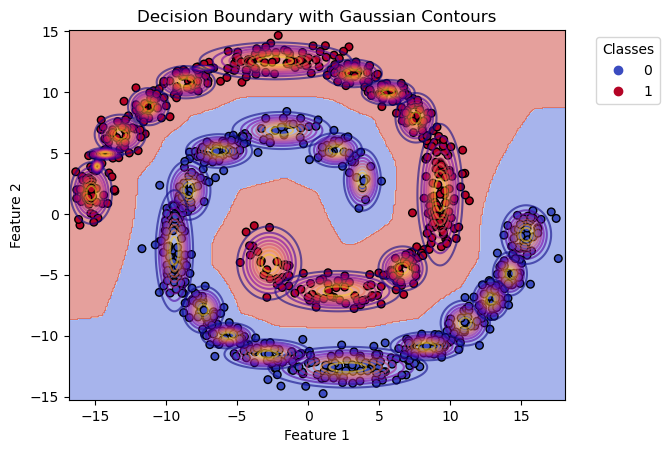

In [182]:
gmm_model = GaussianMixturePerClass(n_components_per_class=1,covariance_type='diag')
gmm_model.fit(X_train, y_train)
plot_gaussian_contours_gmm(X_train, y_train, gmm_model)

## Dataset 3 of assignment 2

In [108]:
df_X_train=pd.read_csv('Dataset-3/train_data.csv',header=None)
df_y_train=pd.read_csv('Dataset-3/train_label.csv',header=None)
X_train=df_X_train.to_numpy()
y_train=df_y_train.to_numpy().flatten()
X_train.shape,y_train.shape

((2100, 36), (2100,))

In [10]:
df_X_test=pd.read_csv('Dataset-3/test_data.csv',header=None)
df_y_test=pd.read_csv('Dataset-3/test_label.csv',header=None)
X_test=df_X_test.to_numpy()
y_test=df_y_test.to_numpy().flatten()
X_test.shape,y_test.shape

((600, 36), (600,))

In [11]:
df_X_val=pd.read_csv('Dataset-3/val_data.csv',header=None)
df_y_val=pd.read_csv('Dataset-3/val_label.csv',header=None)
X_val=df_X_val.to_numpy()
y_val=df_y_val.to_numpy().flatten()
X_val.shape,y_val.shape

((300, 36), (300,))

In [115]:
gmm_model = GaussianMixturePerClass(n_components_per_class=8,covariance_type='full',max_iter=500)
gmm_model.fit(X_train, y_train)

/tmp/ipykernel_11214/3786262218.py:57: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_factor = 1 / np.sqrt(((2 * np.pi) ** n_features) * np.linalg.det(cov))
/tmp/ipykernel_11214/3786262218.py:60: RuntimeWarning: invalid value encountered in multiply
  return normalization_factor * np.exp(adjusted_exponent) * np.exp(max_exponent)
/tmp/ipykernel_11214/3786262218.py:60: RuntimeWarning: overflow encountered in exp
  return normalization_factor * np.exp(adjusted_exponent) * np.exp(max_exponent)
/tmp/ipykernel_11214/3786262218.py:57: RuntimeWarning: invalid value encountered in sqrt
  normalization_factor = 1 / np.sqrt(((2 * np.pi) ** n_features) * np.linalg.det(cov))
/home/sankar/anaconda3/envs/ML/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/tmp/ipykernel_11214/3786262218.py:69: RuntimeWarning: invalid value encountered in divide
  self.resp = self.resp

Converged at iteration 4


In [113]:
calculate_accuracy(y_train,gmm_model.predict(X_train))

0.6804761904761905

In [114]:
calculate_accuracy(y_val,gmm_model.predict(X_val))

0.4766666666666667